In [2]:
'Just list what\'s inside a corrmaps file'

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle


saved_maps= '../simulations/results/social_full.corrmaps'

with open(saved_maps,'rb') as f:
    corrmaps=pickle.load(f)

    
    
print(corrmaps.keys())


dict_keys(['summary_by_class_comb_combination', 'indivudual_social_class_combinations_2', 'indivudual_social_class_combinations_2_config', 'final_summary', 'unsummarized_maps'])


2,35,66.00
8,16,66.00
0,14,66.00
1,16,66.00
1,8,66.00
5,14,66.00
0,5,66.00
0,12,61.00
11,17,59.00
1,15,56.00
0,4,54.00
1,7,53.00
1,6,53.00
4,5,51.00
7,8,51.00
0,3,45.00
0,13,42.00
8,15,40.00
6,8,39.00
3,5,36.00


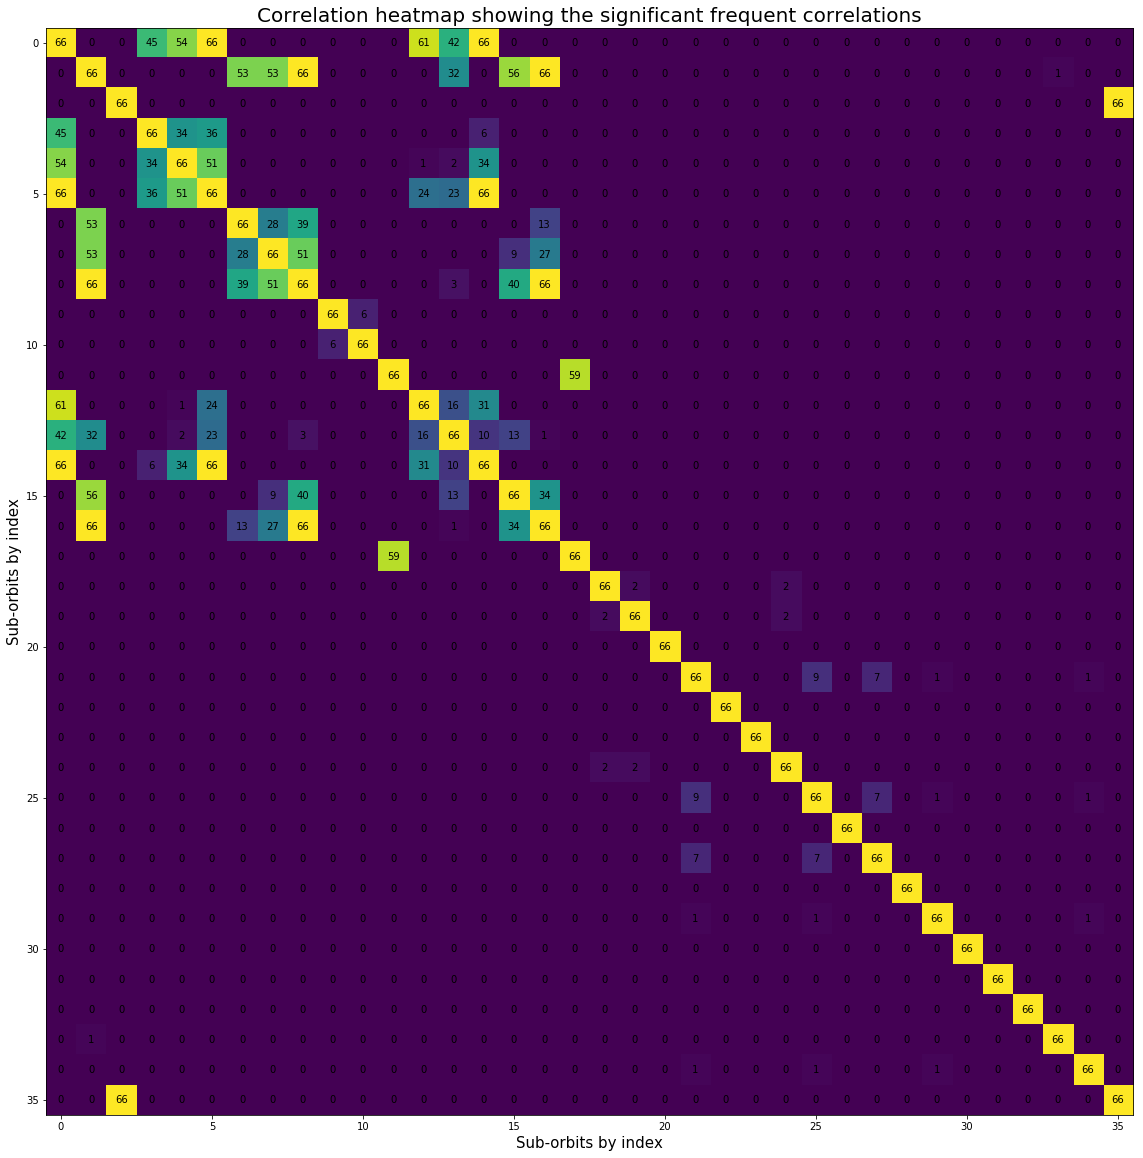

In [3]:
"Main CodeBlock for viewing corrmap files"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle
import os


# =====================================

saved_maps= '../simulations/results/social_full.corrmaps'
class_comb_pref='indivudual_social_class_combinations_'

savedir='../results/economic_all_new'
tosaveImgs=False
doIndividual=False

range_combs=range(2,3)
howManyCorrsS=0
howManyCorrsE=20
# ===================================



def draw_text(corr_map,corr_size):
    
    for i,j in itertools.product(range(corr_size),range(corr_size)):
#         if str(corr_map[i,j])!='0': print( str(corr_map[i,j]))
        plt.text(i, j, str(corr_map[i,j]), va='center', ha='center')
        
        
    

with open(saved_maps,'rb') as f:
    corrmaps=pickle.load(f)



if not os.path.exists(savedir):
    os.makedirs(savedir)

plt.figure(figsize=(20,20))



        
for c_ind,corr_map in enumerate(corrmaps['summary_by_class_comb_combination']):
    plt.clf()
    plt.title('Correlation heatmap showing the significant frequent correlations',size=20)
    plt.xlabel('Sub-orbits by index',size=15)
    plt.ylabel('Sub-orbits by index',size=15)
    plt.imshow(corr_map, interpolation="nearest",cmap='viridis')
    
    corr_key='summary_by_class_comb_combination_'+str(c_ind+2)+'_classes'

    
    if corr_map.shape[0]==36: 
        draw_text(corr_map,corr_map.shape[0])
   
        
    corr_map[np.tril_indices(corr_map.shape[0],0)]=-100
    corr_map_f=corr_map.flatten()
    maxes=np.argsort(-corr_map_f )

    for ind in maxes[:howManyCorrsE]:
        if ind//corr_map.shape[0]==ind%corr_map.shape[0]:
            continue
        print('{},{},{:.2f}'.format(ind//corr_map.shape[0],
                                    ind%corr_map.shape[0] ,
                                corr_map_f[ind] ))
    
    if tosaveImgs: plt.savefig(os.path.join(savedir,
            corr_key)+'.png',dpi=200)

        


In [4]:
"""DRAWING PERCENTILE COUNTMAPS"""


import pickle
        


saved_maps= '../simulations/results/economic_100bigcombs.countmaps'

with open(saved_maps,'rb') as f:
    countmaps=pickle.load(f)

    
    
print(countmaps.keys())


dict_keys(['indivudual_class_combinations_2_config', 'indivudual_class_combinations_2', 'final_summary'])


There are 15390 networks analized


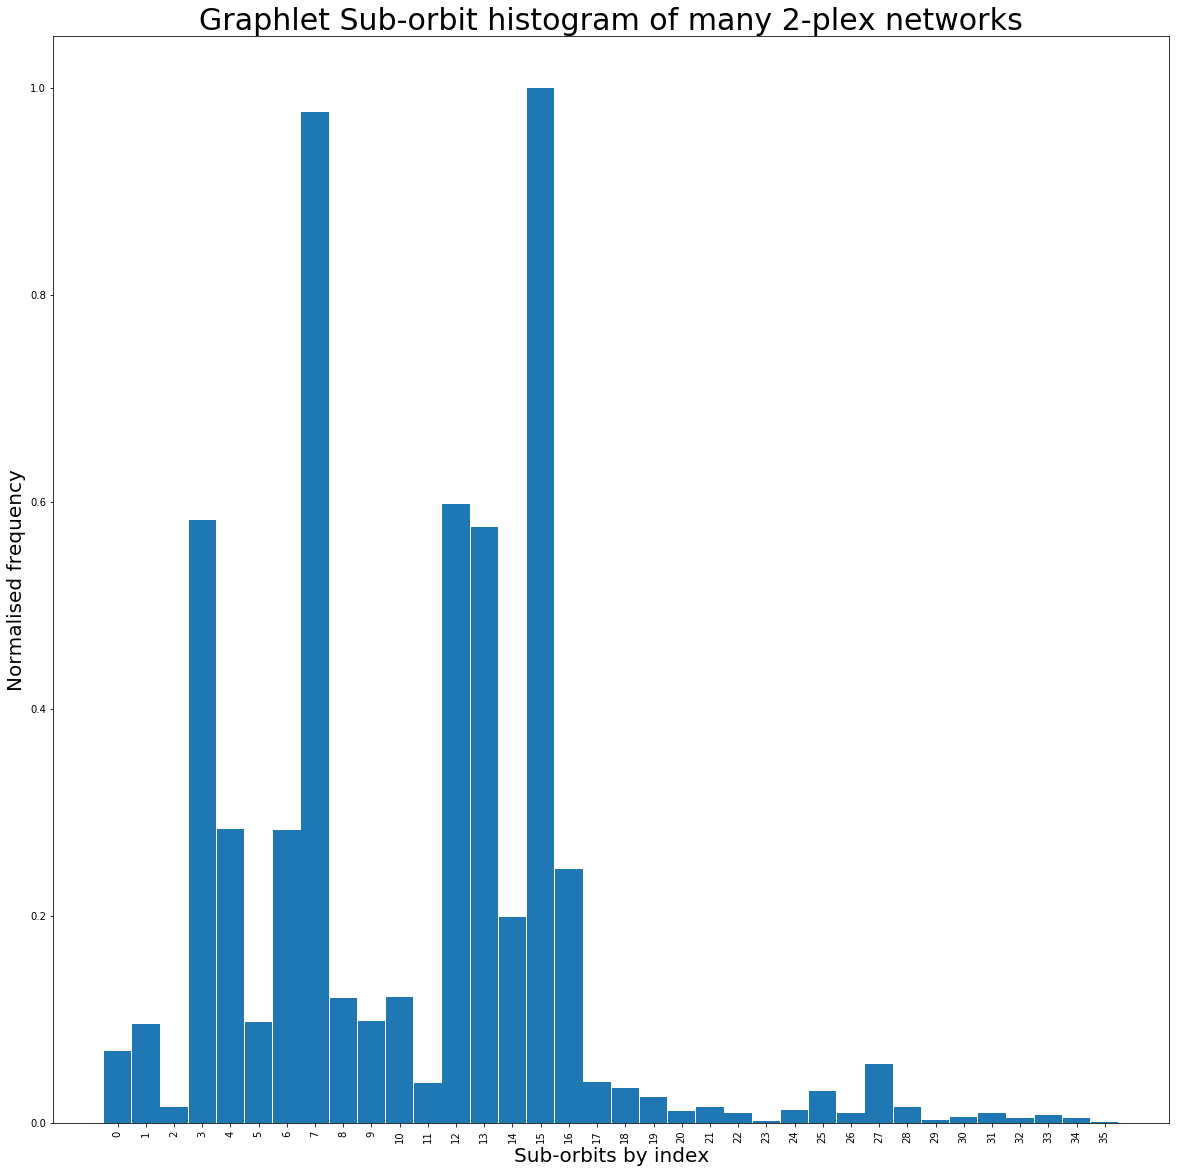

In [7]:
"Main CodeBlock for viewing countmap files"

%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np


saved_maps= '../simulations/results/economic_100bigcombs.countmaps'
savedir='../results/economic'
tosaveImgs=False




# ===================================
sim_scale=np.concatenate((np.array([2,2,2 
             ,2,2,2, 2,2,2, 2,2,2,
             1,1,1, 1,1,1
            ]),np.repeat([3],18) ))

with open(saved_maps,'rb') as f:
    countmaps=pickle.load(f)


for indc,(cDikt,count) in enumerate(countmaps['final_summary']):

    if indc==1:
        break
    print('There are {} networks analized'.format(count))
    
    unwrapped_orbs=[(k,cDikt[k]) for k in cDikt]

    unwrapped_orbs.sort(key=lambda x: x[0])
    unw_max=max([v/oth for (u,v),oth in zip(unwrapped_orbs,sim_scale) ])
    
    lenu=len(unwrapped_orbs)


    plt.figure(figsize=(20,20))
    plt.title('Graphlet Sub-orbit histogram of many 2-plex networks',size=30)
    plt.xlabel('Sub-orbits by index',size=20)
    plt.ylabel('Normalised frequency',size=20)
    plt.bar(np.linspace(0,0.8*lenu,lenu),[unw[1]/(oth*unw_max) for unw,oth in zip(unwrapped_orbs,sim_scale) ],)
    loc,labels=plt.xticks()
    plt.xticks(np.linspace(0,0.8*lenu,lenu),
           [unw[0] for unw in unwrapped_orbs ],rotation=90)
    

    if tosaveImgs: plt.savefig('suborbit_hist.pdf')